In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Adataset_new - final.csv")

In [ ]:
df['category'].value_counts()

category
वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी      2849
पार्किङ्ग तथा मेट्रो पुलिस                  1701
सोधपुछ, सुझाव, प्रशंसा सम्बन्धी             1605
कर्मचारी सम्वन्धी                           1337
अर्थ सबन्धी                                  860
खानेपानी                                     800
स्वास्थ्यसँग सम्बन्धी                        694
सूचना तथा संचार                              640
शान्ति सुरक्षा                               634
फोहोरमैला व्यवस्थापन                         630
निर्माण कार्य सम्बन्धी                       605
प्राकृतिक श्रोत/साधन सम्बन्धी                200
लागु पदार्थ सम्बन्धी                         157
अर्थिक अनियमितता तथा भ्रष्टाचार सम्बन्धी      71
Name: count, dtype: int64

In [ ]:
categories = [
    "वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी",
    "पार्किङ्ग तथा मेट्रो पुलिस",
    "सोधपुछ, सुझाव, प्रशंसा सम्बन्धी",
    "कर्मचारी सम्वन्धी",
    "खानेपानी",
    "अर्थ सबन्धी",
    "शान्ति सुरक्षा",
    "स्वास्थ्यसँग सम्बन्धी",
    "सूचना तथा संचार",
    "फोहोरमैला व्यवस्थापन",
    "निर्माण कार्य सम्बन्धी",
    "प्राकृतिक श्रोत/साधन सम्बन्धी",
    "लागु पदार्थ सम्बन्धी",
    "अर्थिक अनियमितता तथा भ्रष्टाचार सम्बन्धी"
]


In [ ]:

df_final = pd.DataFrame()  # Initialize an empty DataFrame to hold the final result

for category,count in counts.items():
    df_cat=df[df['category']==category]
    if count < max_count:
      df_cat_oversampled=df_cat.sample(max_count,replace=True)
      df_cat_oversampled=df_cat_oversampled.reset_index(drop=True)
    else:
      df_cat_oversampled=df_cat

    df_final=pd.concat([df_final,df_cat_oversampled])


In [ ]:
df_final['category'].value_counts()

category                                  complain                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')  # For English stopwords
print(stop_words)  # This will print the list of English stopwords


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Data Preprocessing
nepali_stopwords = set(stopwords.words('nepali'))
english_stopwords = set(stopwords.words('english'))
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[#\\/।(),०-९<<?!,—–’‘:\u200d]', '', text)
    text = text.strip('"')
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in nepali_stopwords and word.lower() not in english_stopwords]
    processed_text = ' '.join(filtered_words)
    return processed_text

df_final['complain'] = df_final['complain'].apply(preprocess_text)

In [ ]:
# Encoding Labels
le = LabelEncoder()
df_final['label_encoded'] = le.fit_transform(df_final['category'])


In [ ]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df_final, test_size=0.2, stratify=df_final['label_encoded'], random_state=42)


In [ ]:
# Tokenize the text data
max_words = 10000
max_length = 100
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data['complain'])

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_data['complain'])
test_sequences = tokenizer.texts_to_sequences(test_data['complain'])

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Load your pre-trained Nepali Word2Vec model
word2vec_model_path = "/content/drive/MyDrive/nepaliW2V_5Million.model"
word2vec_model = Word2Vec.load(word2vec_model_path)

In [ ]:
# Create an embedding matrix
embedding_dim = word2vec_model.vector_size
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < max_words and word in word2vec_model.wv:

        embedding_matrix[i] = word2vec_model.wv[word]

In [ ]:
# Build the Bi-LSTM model with Word2Vec embeddings
lstm_units=100
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=len(np.unique(df_final['label_encoded'])), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 20
history=model.fit(train_padded, train_data['label_encoded'], epochs=epochs, validation_data=(test_padded, test_data['label_encoded']))


Epoch 1/20
1002/1002 [==============================] - 287s 281ms/step - loss: 2.3956 - accuracy: 0.1536 - val_loss: 2.4772 - val_accuracy: 0.1279
Epoch 2/20
1002/1002 [==============================] - 267s 267ms/step - loss: 2.3731 - accuracy: 0.1575 - val_loss: 2.5756 - val_accuracy: 0.1158
Epoch 3/20
1002/1002 [==============================] - 259s 259ms/step - loss: 2.3683 - accuracy: 0.1697 - val_loss: 2.2866 - val_accuracy: 0.1796
Epoch 4/20
1002/1002 [==============================] - 257s 257ms/step - loss: 2.1777 - accuracy: 0.1941 - val_loss: 2.0669 - val_accuracy: 0.2194
Epoch 5/20
1002/1002 [==============================] - 259s 259ms/step - loss: 2.0436 - accuracy: 0.2330 - val_loss: 1.8406 - val_accuracy: 0.3208
Epoch 6/20
1002/1002 [==============================] - 267s 266ms/step - loss: 1.6711 - accuracy: 0.4003 - val_loss: 1.4335 - val_accuracy: 0.4998
Epoch 7/20
1002/1002 [==============================] - 267s 267ms/step - loss: 1.3645 - accuracy: 0.5345 - val_

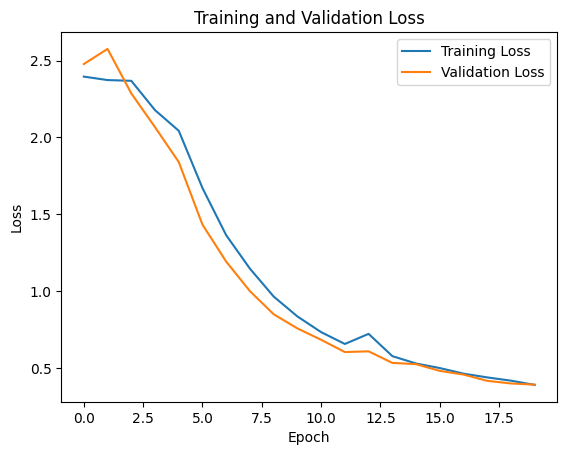

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

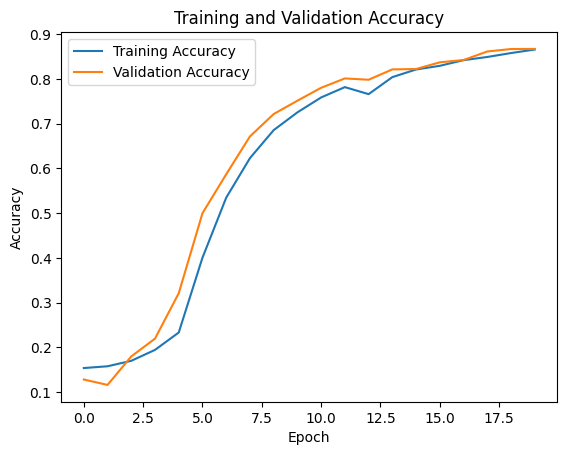

In [ ]:
# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model
y_pred_probs = model.predict(test_padded)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Decode the encoded labels back to original classes
y_true = le.inverse_transform(test_data['label_encoded'])
y_pred_decoded = le.inverse_transform(y_pred)

# Print the classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred_decoded))


251/251 [==============================] - 12s 47ms/step
Classification Report:
                                          precision    recall  f1-score   support

                             अर्थ सबन्धी       0.86      0.85      0.85       572
अर्थिक अनियमितता तथा भ्रष्टाचार सम्बन्धी       0.98      1.00      0.99       573
                       कर्मचारी सम्वन्धी       0.81      0.69      0.75       573
                                खानेपानी       0.98      0.99      0.99       573
                  निर्माण कार्य सम्बन्धी       0.95      0.87      0.91       573
              पार्किङ्ग तथा मेट्रो पुलिस       0.85      0.89      0.87       572
           प्राकृतिक श्रोत/साधन सम्बन्धी       0.99      1.00      0.99       573
                    फोहोरमैला व्यवस्थापन       0.88      0.92      0.90       573
                    लागु पदार्थ सम्बन्धी       1.00      0.97      0.98       572
  वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी       0.72      0.52      0.60       570
                 

In [ ]:
model.save("/content/drive/MyDrive/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model('/content/drive/MyDrive/model.h5')



In [ ]:
# New Nepali text
new_text = "यस महानगरपालिकाको सुनाकोठी नखिपोट नख्खुडोल गोकुल आवास कान्तिपुर कोलोनीका वासिन्दाले दिनरात यो धुंवाको सास कहिलेसम्म फेर्नुपर्ने हो हजुर?"

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Tokenize and pad the sequence
new_sequence = tokenizer.texts_to_sequences([processed_text])
new_padded = pad_sequences(new_sequence, maxlen=max_length, padding='post', truncating='post')

# Make predictions
new_pred_probs = loaded_model.predict(new_padded)
new_pred_class = np.argmax(new_pred_probs, axis=1)[0]
predicted_class_label = le.inverse_transform([new_pred_class])[0]

# Print the result
print(f"Predicted Class: {predicted_class_label} (Class {new_pred_class})")

1/1 [==============================] - 0s 319ms/step
Predicted Class: स्वास्थ्यसँग सम्बन्धी (Class 13)


In [ ]:
# New Nepali text
new_text = "सुनसरी जिल्ला इटहरी उप महानगर भित्र अवस्थित धरान पुग्ने यो बाटो । कुन ठेकेदारले यो काम गर्दा कति पैसा कुम्ल्याउन पाइने हो र आफ्नो निर्वाचन ताका खर्च भएको करोड उठाउन पाइन्छ भनेर त हैन ?"

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Tokenize and pad the sequence
new_sequence = tokenizer.texts_to_sequences([processed_text])
new_padded = pad_sequences(new_sequence, maxlen=max_length, padding='post', truncating='post')

# Make predictions
new_pred_probs = model.predict(new_padded)
new_pred_class = np.argmax(new_pred_probs, axis=1)[0]
predicted_class_label = le.inverse_transform([new_pred_class])[0]

# Print the result
print(f"Predicted Class: {predicted_class_label} (Class {new_pred_class})")

1/1 [==============================] - 0s 40ms/step
Predicted Class: कर्मचारी सम्वन्धी (Class 2)


In [ ]:
# New Nepali text
new_text = "काठमाडौं मा मेलम्ची को पानी बितरन्ण भयो भन्छ । हामी मा अहीपुग्ने कहिले हो मेरो मा पानी न आहेक्क आजको दिन टक्काइ ४० दिन भयो । खानी पानी कार्यल मा भनो भने पाले ले आजै दिन्छ भन्छ हामी लाई फर्काइ दिन्छ अब भन्नुस् कति दिन यो महङ्गो मा पानी किनेर जिबन याबन गर्ने । हजुर हरु लाई के लाग्छ के हामी पानी बिना को जिबन जिउन सकिन्छ त ।कृपया हाम्रो समस्य बुझीदिन्छ कि भनेर हजुर सम्म यो गुनासो पठाउन बात्य भएको छु ।"

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Tokenize and pad the sequence
new_sequence = tokenizer.texts_to_sequences([processed_text])
new_padded = pad_sequences(new_sequence, maxlen=max_length, padding='post', truncating='post')

# Make predictions
new_pred_probs = model.predict(new_padded)
new_pred_class = np.argmax(new_pred_probs, axis=1)[0]
predicted_class_label = le.inverse_transform([new_pred_class])[0]

# Print the result
print(f"Predicted Class: {predicted_class_label} (Class {new_pred_class})")

1/1 [==============================] - 0s 43ms/step
Predicted Class: खानेपानी (Class 3)


In [ ]:
# New Nepali text
new_text = "नगरिक ऐप नागरिकता संशोधन"

# Preprocess the new text
processed_text = preprocess_text(new_text)

# Tokenize and pad the sequence
new_sequence = tokenizer.texts_to_sequences([processed_text])
new_padded = pad_sequences(new_sequence, maxlen=max_length, padding='post', truncating='post')

# Make predictions
new_pred_probs = model.predict(new_padded)
new_pred_class = np.argmax(new_pred_probs, axis=1)[0]
predicted_class_label = le.inverse_transform([new_pred_class])[0]

# Print the result
print(f"Predicted Class: {predicted_class_label} (Class {new_pred_class})")

1/1 [==============================] - 0s 39ms/step
Predicted Class: वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी (Class 9)


In [ ]:
[
    {'category': 'वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी', 'count': 2849},
    {'category': 'सोधपुछ, सुझाव, प्रशंसा सम्बन्धी', 'count': 1875},
    {'category': 'पार्किङ्ग तथा मेट्रो पुलिस', 'count': 1702},
    {'category': 'कर्मचारी सम्वन्धी', 'count': 1345},
    {'category': 'स्वास्थ्यसँग सम्बन्धी', 'count': 970},
    {'category': 'अर्थ सबन्धी', 'count': 860},
    {'category': 'खानेपानी सम्बन्धी', 'count': 765},
    {'category': 'सूचना तथा संचार सम्बन्धी', 'count': 639},
    {'category': 'फोहोरमैला व्यवस्थापन', 'count': 630},
    {'category': 'निर्माण कार्य सम्बन्धी', 'count': 604},
    {'category': 'शान्ति सुरक्षा सम्बन्धी', 'count': 557},
    {'category': 'प्राकृतिक श्रोत/साधन सम्बन्धी', 'count': 233},
    {'category': 'लागु पदार्थ सम्बन्धी', 'count': 157},
    {'category': 'अर्थिक अनियमितता तथा भ्रष्टाचार सम्बन्धी', 'count': 71}
]


In [ ]:
[
    {'category': 'वेबसाइट तथा अभिलेख व्यवस्थापन सम्बन्धी', 'count': 2849},
    {'category': 'सोधपुछ, सुझाव, प्रशंसा सम्बन्धी', 'count': 1875},
    {'category': 'पार्किङ्ग तथा मेट्रो पुलिस', 'count': 1702},
    {'category': 'कर्मचारी सम्वन्धी', 'count': 1345},
    {'category': 'स्वास्थ्यसँग सम्बन्धी', 'count': 970},
    {'category': 'अर्थ सबन्धी', 'count': 860},
    {'category': 'खानेपानी सम्बन्धी', 'count': 765},
    {'category': 'सूचना तथा संचार सम्बन्धी', 'count': 639},
    {'category': 'फोहोरमैला व्यवस्थापन', 'count': 630},
    {'category': 'निर्माण कार्य सम्बन्धी', 'count': 604},
    {'category': 'शान्ति सुरक्षा सम्बन्धी', 'count': 557},
    {'category': 'प्राकृतिक श्रोत/साधन सम्बन्धी', 'count': 233},
    {'category': 'लागु पदार्थ सम्बन्धी', 'count': 350},
    {'category': 'अर्थिक अनियमितता तथा भ्रष्टाचार सम्बन्धी', 'count': 300}
]


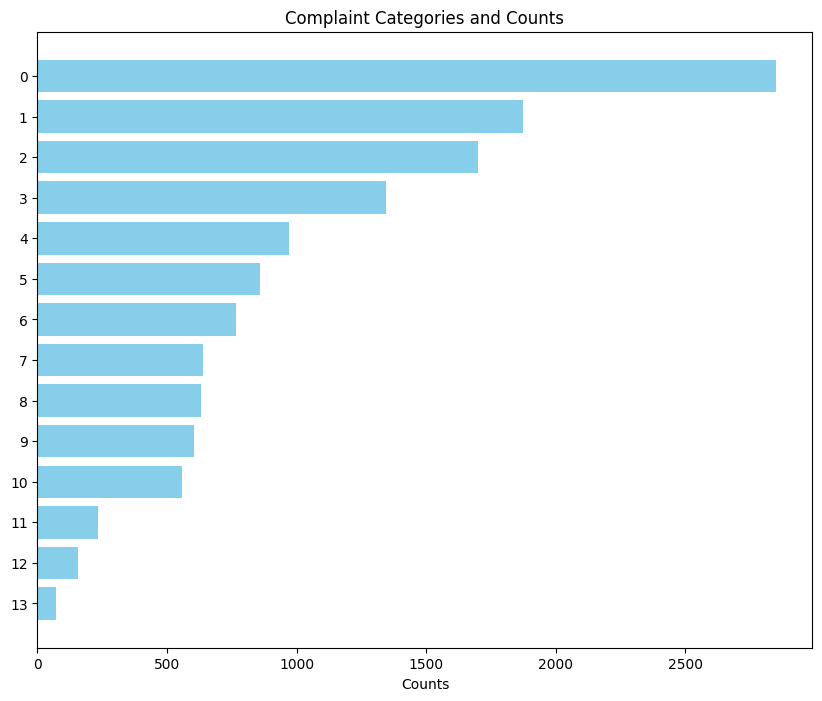

In [ ]:
import matplotlib.pyplot as plt

# Categories and counts from the provided table
categories = [ str(i) for i in range(0,14,1)]
counts = [2849, 1875, 1702, 1345, 970, 860, 765, 639, 630, 604, 557, 233, 157, 71]
counts2 = [2849, 1875, 1702, 1542, 1040, 964, 880, 739, 730, 714, 657, 450, 290, 200]

plt.figure(figsize=(10, 8))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Counts')
plt.title('Complaint Categories and Counts')
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.show()


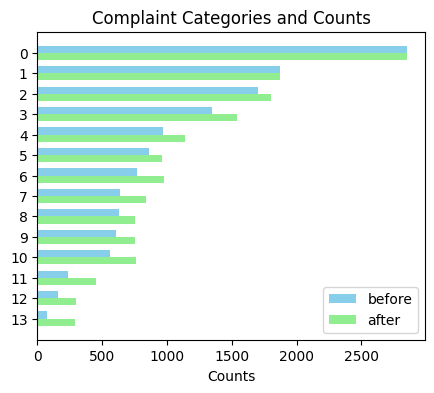

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Categories and counts from the provided table
categories = [str(i) for i in range(0, 14, 1)]
before = [2849, 1875, 1702, 1345, 970, 860, 765, 639, 630, 604, 557, 233, 157, 71]
after = [2849, 1875, 1800, 1542, 1140, 964, 980, 839, 750, 750, 757, 450, 300, 288]

y_pos = np.arange(len(categories))

# Bar width
bar_width = 0.35

plt.figure(figsize=(5, 4))

# Plotting both the counts and counts2 side by side
plt.barh(y_pos - bar_width/2, before, bar_width, label='before', color='skyblue')
plt.barh(y_pos + bar_width/2, after, bar_width, label='after', color='lightgreen')

plt.xlabel('Counts')
plt.title('Complaint Categories and Counts')
plt.yticks(y_pos, categories)
plt.gca().invert_yaxis()  # Display the highest count at the top
plt.legend()

plt.show()
